<a href="https://colab.research.google.com/github/sneha-4515/Data_science_projects/blob/main/loan_tap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.


WE as a data scientist at LoanTap are responsible for is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

They deploys formal credit to salaried individuals and businesses.

The focus is on the underwriting process behind Personal Loan.




Objective:

To find out what factor are more important to judge whom to provide loan.

More focus on loan_status as charged off one may be the issue or loss for the organisation.



# Exploratory Data Analysis

Importing of important Libraries for Data Exploration and Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
!gdown 1E7ZVhynwOEq14VF1U4QXqcMXw4onZAto

df = pd.read_csv("logistic_regression.csv")  # Make sure this file is in the same directory
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1E7ZVhynwOEq14VF1U4QXqcMXw4onZAto
To: /content/logistic_regression.csv
100% 92.4M/92.4M [00:01<00:00, 62.6MB/s]
   loan_amnt        term  int_rate  installment grade sub_grade  \
0      10000   36 months     11.44       329.48     B        B4   
1       8000   36 months     11.99       265.68     B        B5   
2      15600   36 months     10.49       506.97     B        B3   
3       7200   36 months      6.49       220.65     A        A2   
4      24375   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ..

In [ ]:
loan_tap= df.copy()

In [ ]:
loan_tap.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
print(loan_tap.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
print("Total no of rows:",loan_tap.shape[0])
print("Total no of Columns:",loan_tap.shape[1])

Total no of rows: 396030
Total no of Columns: 27


There are 396030 records with total of 7 27 columns

# Checking Missing Values

In [ ]:
loan_tap.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


There are numourous null value in the dataset for many columns

In [ ]:
loan_tap['emp_title'].value_counts().head(2)

,count
emp_title,
Teacher,4389
Manager,4250


# Handling Missing Values & Useless columns

In [ ]:
columns_to_drop = [
    'emp_title', 'title', 'address', 'issue_d', 'earliest_cr_line',
    'sub_grade', 'initial_list_status', 'application_type','pub_rec_bankruptcies'
]

loan_tap = loan_tap.drop(columns=columns_to_drop)

loan_tap['emp_length'].fillna('Missing', inplace=True)
loan_tap['mort_acc'].fillna(0, inplace=True)
loan_tap['revol_util'].fillna(0, inplace=True)

Dropped two columns emp_title & pub_rec_bankruptcies

1.emp_title has too many unique values that is not required.

2.pub_rec_bankruptcies is correlated with pub_rec & redundant too .

Check after handling missing values

In [ ]:
loan_tap.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
loan_status,0


Data is clean with no null values

# Converting Categorical column into category

In [ ]:
cat_var = ['term','home_ownership', 'emp_length','verification_status','loan_status','purpose','grade']
for col in cat_var:
  loan_tap[col] = loan_tap[col].astype("category")

Statistical Summary

In [ ]:
loan_tap.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,396030.0,53.754260,24.484857,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Checking for outliers

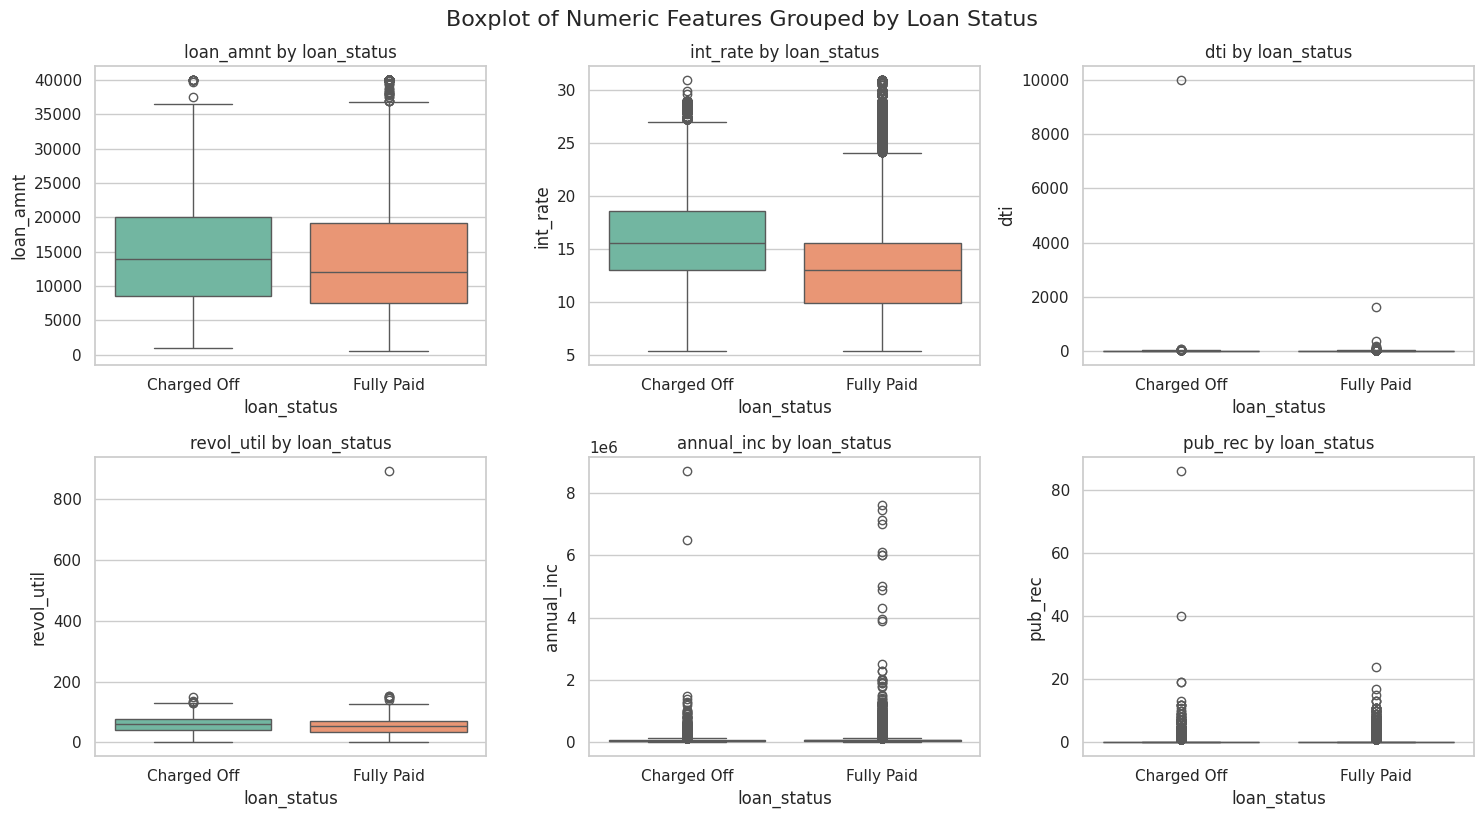

In [ ]:
# Define target (loan_status) and numeric features
group_col = 'loan_status'
num_cols = ['loan_amnt', 'int_rate', 'dti', 'revol_util', 'annual_inc','pub_rec']

# Set up subplot grid
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=loan_tap, x=group_col, y=col, palette='Set2')
    plt.title(f'{col} by {group_col}', fontsize=12)
    plt.xlabel(group_col)
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle("Boxplot of Numeric Features Grouped by Loan Status", fontsize=16, y=1.02)
plt.show()


# Outlier Treatment

<Figure size 1600x3300 with 0 Axes>

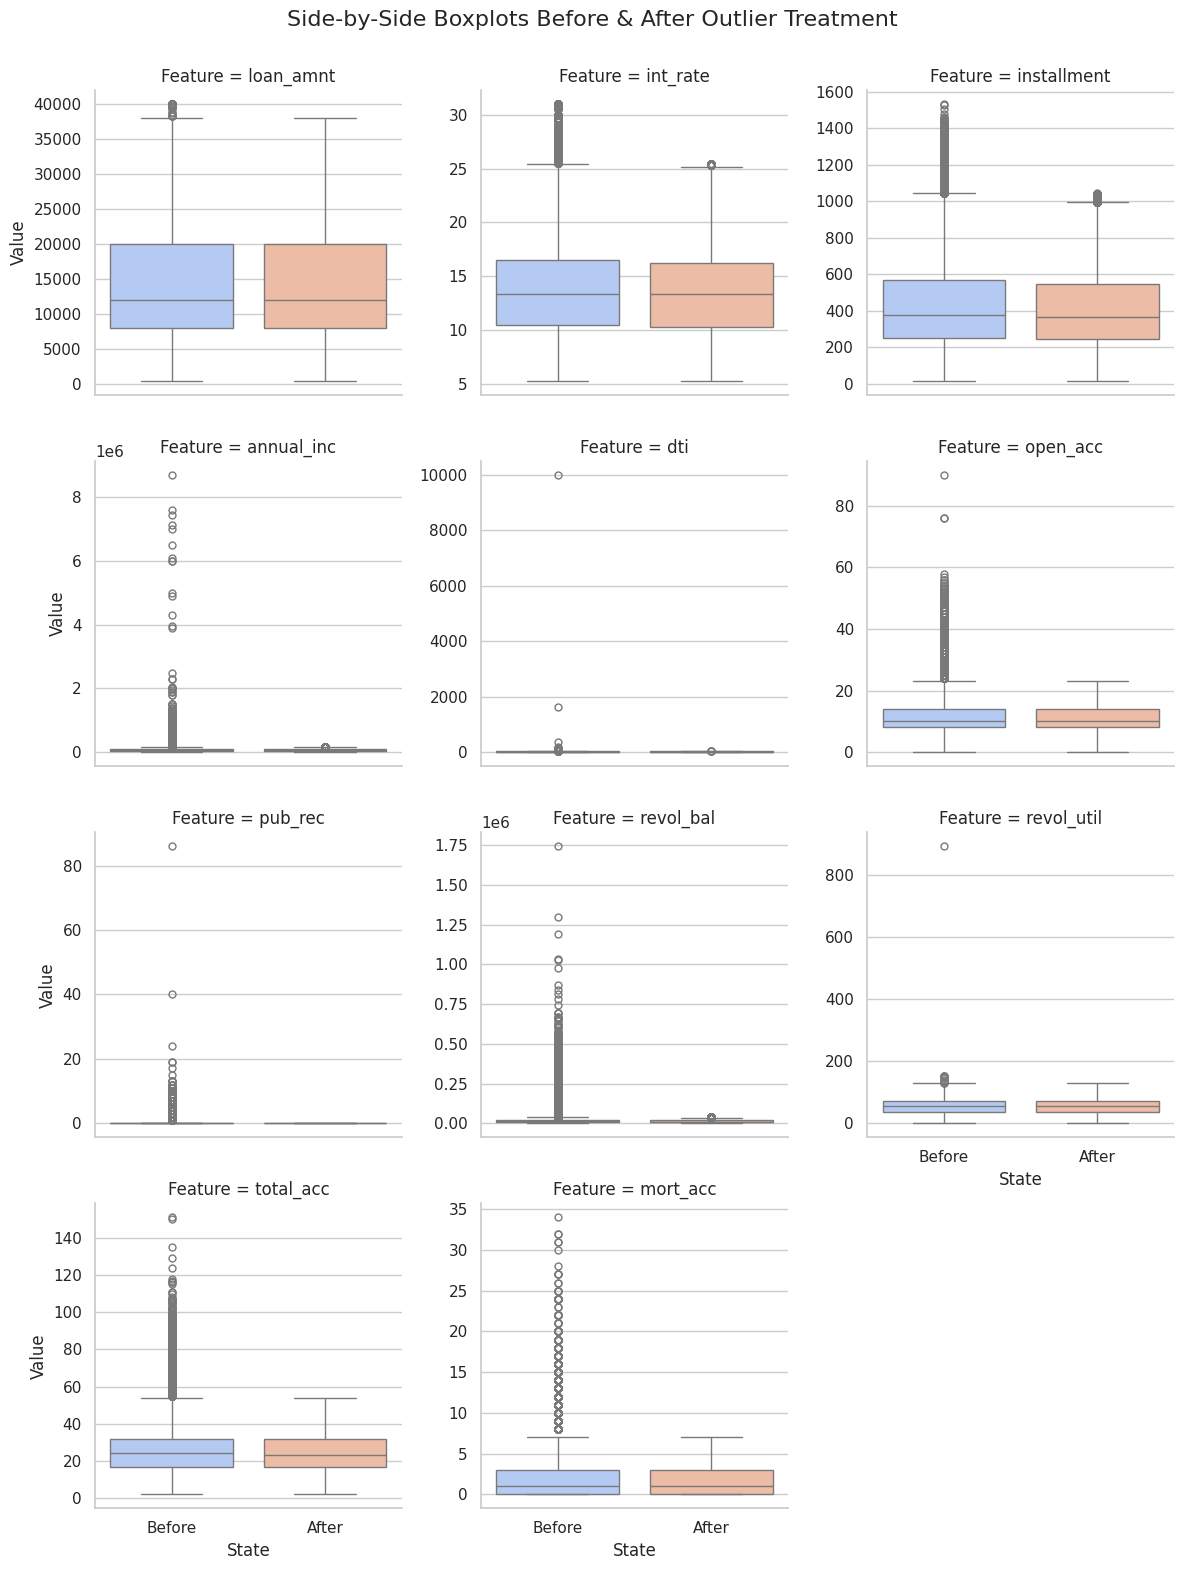

In [ ]:
# Step 1: Identify numerical columns
num_cols = loan_tap.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Create a copy for cleaned data
df_no_outliers = loan_tap.copy()

# Step 3: Remove outliers using IQR for each numerical column
for col in num_cols:
    Q1 = loan_tap[col].quantile(0.25)
    Q3 = loan_tap[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[col] = loan_tap[col].where(
        (loan_tap[col] >= lower_bound) & (loan_tap[col] <= upper_bound)
    )

# Step 4: Reshape data for side-by-side boxplot comparison
# Create a long-format DataFrame with "Before" and "After"
combined_data = pd.DataFrame()

for col in num_cols:
    before = loan_tap[col].copy()
    after = df_no_outliers[col].copy()

    temp = pd.DataFrame({
        'Value': pd.concat([before, after], ignore_index=True),
        'State': ['Before'] * len(before) + ['After'] * len(after),
        'Feature': [col] * (len(before) + len(after))
    })
    combined_data = pd.concat([combined_data, temp], ignore_index=True)

# Step 5: Plot side-by-side boxplots
plt.figure(figsize=(16, len(num_cols) * 3))
sns.set(style="whitegrid")

g = sns.catplot(
    x='State', y='Value', col='Feature',
    data=combined_data, kind='box',
    col_wrap=3, height=4, aspect=1,
    palette='coolwarm', sharey=False
)

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Side-by-Side Boxplots Before & After Outlier Treatment", fontsize=16)
plt.show()


# Univariant Analysis

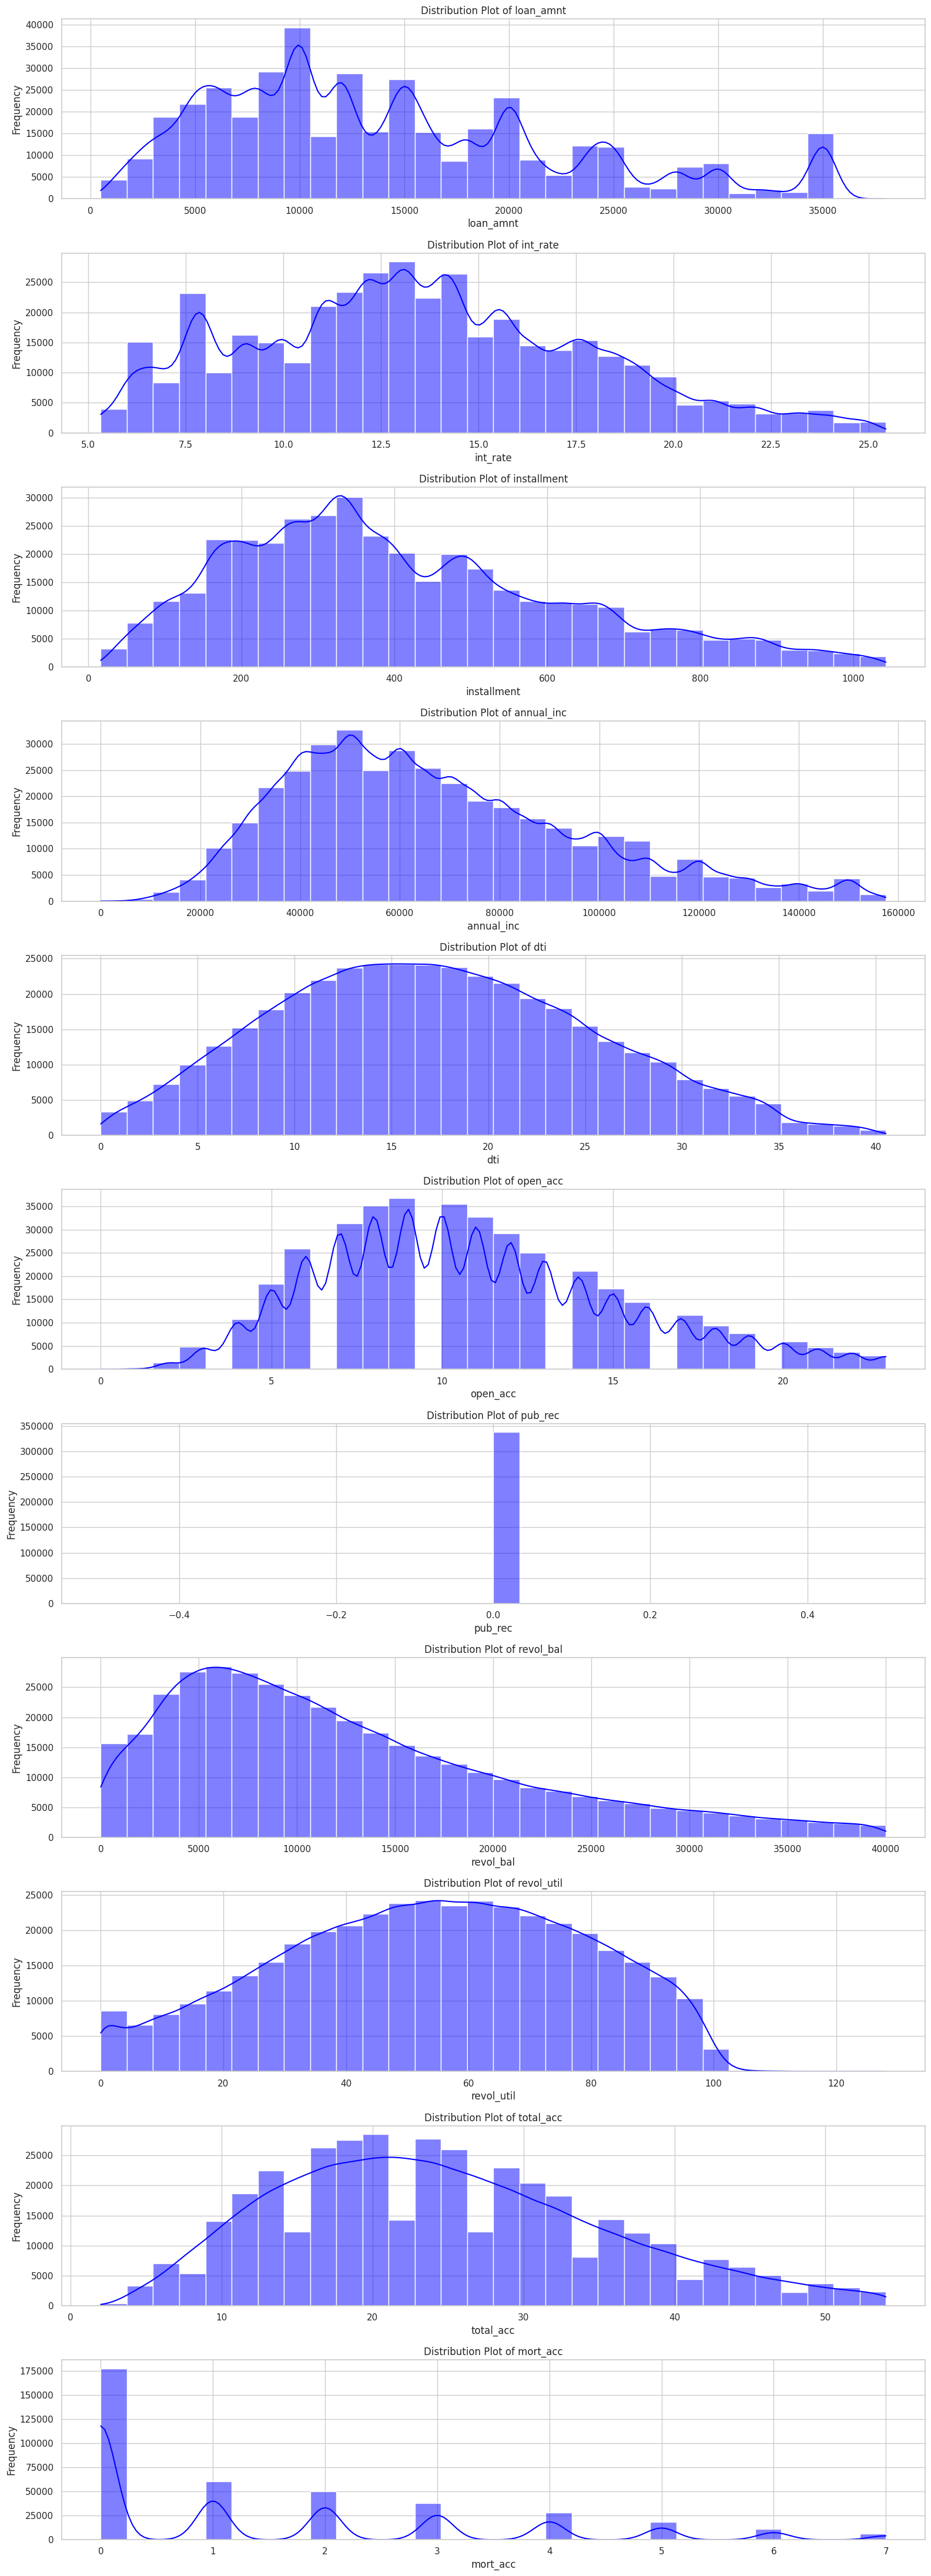

In [ ]:
# Set the style
sns.set(style='whitegrid')

# Separate numerical and categorical columns
num_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

# ------------------------
# Part 1: Continuous Variables (Univariate Distribution)
# ------------------------
n_num = len(num_cols)
plt.figure(figsize=(16, n_num * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_num, 1, i + 1)
    sns.histplot(df_no_outliers[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




In [ ]:
'''# ------------------------
# Part 2: Categorical Variables (Count Plots)
# ------------------------
cat_cols = df_no_outliers.select_dtypes(include=['category']).columns

n_cat = len(cat_cols)
plt.figure(figsize=(16, n_cat * 4))

for i, col in enumerate(cat_cols):
    plt.subplot(n_cat, 1, i + 1)
    sns.countplot(data=df_no_outliers, x=col, palette='Set2', order=df_no_outliers[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()'''

'# ------------------------\n# Part 2: Categorical Variables (Count Plots)\n# ------------------------\ncat_cols = df_no_outliers.select_dtypes(include=[\'category\']).columns\n\nn_cat = len(cat_cols)\nplt.figure(figsize=(16, n_cat * 4))\n\nfor i, col in enumerate(cat_cols):\n    plt.subplot(n_cat, 1, i + 1)\n    sns.countplot(data=df_no_outliers, x=col, palette=\'Set2\', order=df_no_outliers[col].value_counts().index)\n    plt.title(f\'Count Plot of {col}\')\n    plt.xlabel(col)\n    plt.ylabel("Count")\n    plt.xticks(rotation=45)\n\nplt.tight_layout()\nplt.show()'

# Bivariant Analysis

In [ ]:
status_counts=df_no_outliers['loan_status'].value_counts()
status_percent = df_no_outliers['loan_status'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
loan_status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage (%)': status_percent.round(2)
})

print(loan_status_summary)

              Count  Percentage (%)
loan_status                        
Fully Paid   318357           80.39
Charged Off   77673           19.61


Insights:

Around 19.61 % is the charged off percentage & 77673 is the value of loan_status that must be manage properly to avoid any loss.


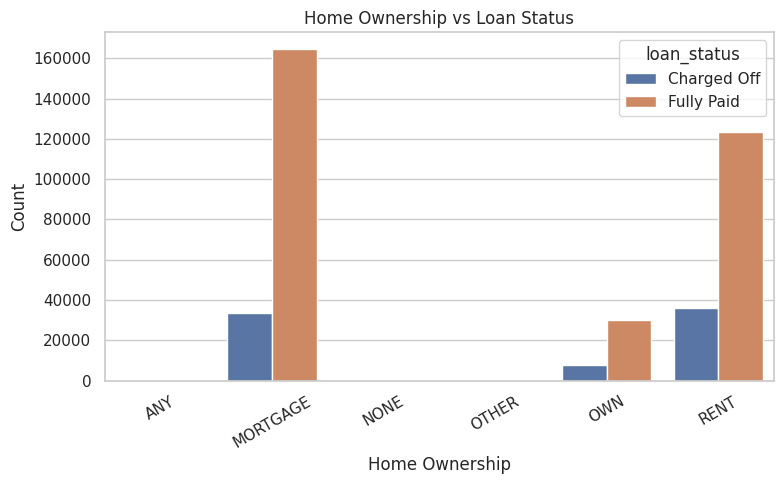

In [ ]:

# Example: Plotting 'home_ownership' vs 'loan_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='home_ownership', hue='loan_status', data=df_no_outliers)
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



Observation:

1.A majority of borrowers fall under the "MORTGAGE" category.

2. Borrowers with mortgages seem to have good repayment behavior, indicating lower risk.

3."RENT" is the second most common home ownership status.

4.It has a notable number of charged-off loans, indicating a higher risk compared to "MORTGAGE".

Actionable Insight: Be cautious while approving loans for customers who rent their homes. Maybe apply stricter underwriting filters.

5.The "OWN" group has a relatively small number of applicants.

However, a higher percentage of them fully paid the loan.

Main outcome: Owning a home may indicate financial stability.


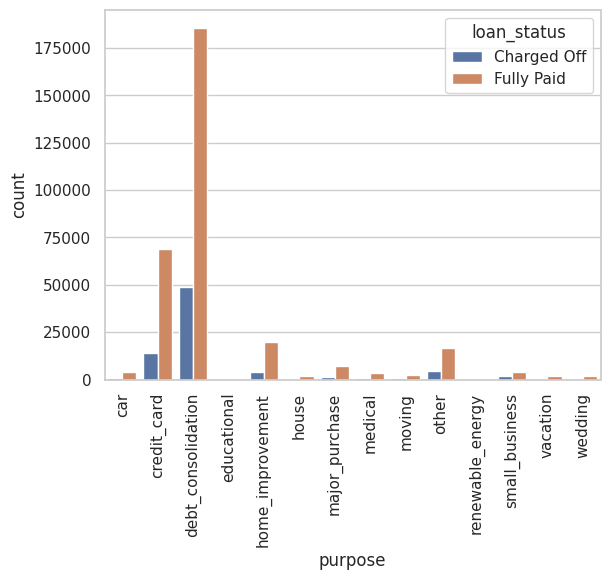

In [ ]:
# Loan status vs purpose
sns.countplot(x='purpose', hue='loan_status', data=df_no_outliers)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Group by purpose and loan_status to get counts
purpose_loan_counts = df_no_outliers.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Add total loans per purpose
purpose_loan_counts['Total'] = purpose_loan_counts.sum(axis=1)

# Calculate percentage
purpose_loan_counts['% Charged Off'] = (purpose_loan_counts['Charged Off'] / purpose_loan_counts['Total']) * 100
purpose_loan_counts['% Fully Paid'] = (purpose_loan_counts['Fully Paid'] / purpose_loan_counts['Total']) * 100

# Optional: Sort by total volume
purpose_loan_counts = purpose_loan_counts.sort_values(by='Total', ascending=False)

# Round off percentages for better readability
purpose_loan_counts = purpose_loan_counts.round(2)

# Display the result
print(purpose_loan_counts[['Charged Off', 'Fully Paid', 'Total', '% Charged Off', '% Fully Paid']])



loan_status         Charged Off  Fully Paid   Total  % Charged Off  \
purpose                                                              
debt_consolidation        48640      185867  234507          20.74   
credit_card               13874       69145   83019          16.71   
home_improvement           4087       19943   24030          17.01   
other                      4495       16690   21185          21.22   
major_purchase             1448        7342    8790          16.47   
small_business             1679        4022    5701          29.45   
car                         633        4064    4697          13.48   
medical                     911        3285    4196          21.71   
moving                      670        2184    2854          23.48   
vacation                    464        1988    2452          18.92   
house                       434        1767    2201          19.72   
wedding                     219        1593    1812          12.09   
renewable_energy    

### 🔑 **Key Insights:**

1. ### **Debt Consolidation Dominates**

   * **Most common purpose** for loans is **debt\_consolidation**, by a large margin.
   * While many such loans are **Fully Paid**, a **significant portion** is also **Charged Off**, indicating a **higher risk category**.

2. ### **Credit Card Loans – Second Highest Volume**

   * After debt consolidation, **credit\_card** is the next most common loan purpose.
   * **Charged Off** loans are notably present, though less than fully paid, suggesting **moderate risk**.

3. ### **Renewable energy and Small Business Loans Have Higher Risk**

   * Though **renewable** and **small\_business** loans are fewer in number, they have a **high proportion of Charged Off** loans.
   * This indicates **relatively higher default risk** compared to other purposes.

4. ### **Low Risk Segments**

   * **Car**, **house**, **major\_purchase**, and **medical** loans show **lower Charged Off counts**, implying **lower risk and better repayment**.

5. ### **Rare but Risky**

   * **Wedding** and **vacation**  loans are relatively **rare**, but the **Charged Off count is visible**—indicating that **non-essential purposes may carry risk despite low volume**.

6. ### **Opportunity to Reassess Lending Policies**

   * The stark contrast between **Fully Paid** and **Charged Off** for specific purposes can help institutions **refine their credit policy** or apply **stricter underwriting criteria** for higher-risk categories (like debt\_consolidation or small\_business).





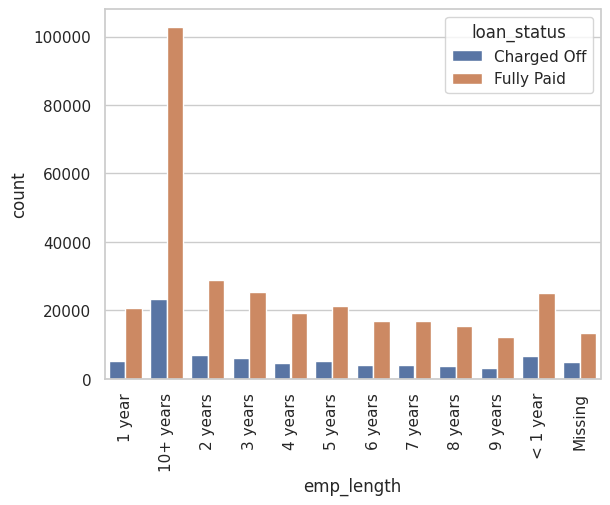

In [ ]:
sns.countplot(x='emp_length', hue='loan_status', data=df_no_outliers)
plt.xticks(rotation=90)
plt.show()

The ratio of persons working for more than 10 years have the highest fully paid laon status.

More emphasis will be given on the person who working duration is less than 2 years

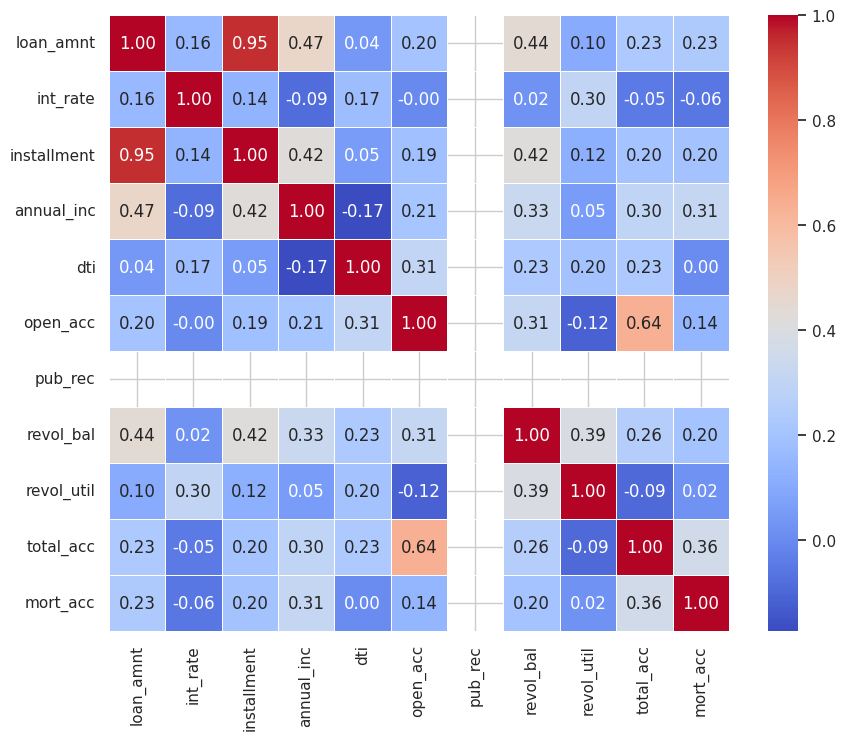

In [ ]:
df_numeric = df_no_outliers.select_dtypes(include=['number'])
corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
df_no_outliers['term'].value_counts()

,count
term,
36 months,302005
60 months,94025


Maximum people are opting laon for 3 years

In [ ]:
df_no_outliers.drop('term',axis=1,inplace=True)

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   loan_amnt            395839 non-null  float64 
 1   int_rate             392253 non-null  float64 
 2   installment          384780 non-null  float64 
 3   grade                396030 non-null  category
 4   emp_length           396030 non-null  category
 5   home_ownership       396030 non-null  category
 6   annual_inc           379330 non-null  float64 
 7   verification_status  396030 non-null  category
 8   loan_status          396030 non-null  category
 9   purpose              396030 non-null  category
 10  dti                  395755 non-null  float64 
 11  open_acc             385723 non-null  float64 
 12  pub_rec              338272 non-null  float64 
 13  revol_bal            374771 non-null  float64 
 14  revol_util           396018 non-null  float64 
 15  

In [ ]:
df = df_no_outliers.copy()

In [ ]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc'],
      dtype='object')

# Model training

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Start from a copy
df = df_no_outliers.copy()

# Map the loan status
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Label encode
label_enc_cols = ['grade', 'emp_length']
le = LabelEncoder()
for col in label_enc_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# One-hot encode remaining
cat_cols = df.select_dtypes(include=['object', 'category']).columns.difference(label_enc_cols + ['loan_status']).tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Now print to check
print("Columns after encoding:", df_encoded.columns.tolist())
# Sample
df_sample = df_encoded.sample(n=10000, random_state=42)

# Split
X = df_sample.drop(columns='loan_status')
y = df_sample['loan_status']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Columns after encoding: ['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'verification_status_Source Verified', 'verification_status_Verified']


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8000, 33), (8000,), (2000, 33), (2000,))

In [ ]:
# Step 8: Scale numeric columns (excluding label-encoded or dummy variables)
exclude_from_scaling = label_enc_cols + [col for col in X_train.columns if col.startswith(tuple(cat_cols))]
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_from_scaling)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())

NaNs in X_train: 2758
NaNs in X_test: 662


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # or use 'median' or 'most_frequent' as needed

# Fit only on training data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform test data
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [ ]:
# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)



LogisticRegression(max_iter=1000)

# Model coefficients with column names

In [ ]:
feature_names = X_train_imputed.columns

# Get model coefficients (1D array)
coefficients = model.coef_[0]  # shape: (1, n_features), so we use [0]

# Combine into a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
coef_df

,Feature,Coefficient
0,loan_amnt,-0.165036
1,int_rate,-0.120531
2,installment,0.026580
3,grade,-0.316121
4,emp_length,-0.016256
5,annual_inc,0.212072
6,dti,-0.240077
7,open_acc,-0.064698
8,pub_rec,0.000000
9,revol_bal,0.021613


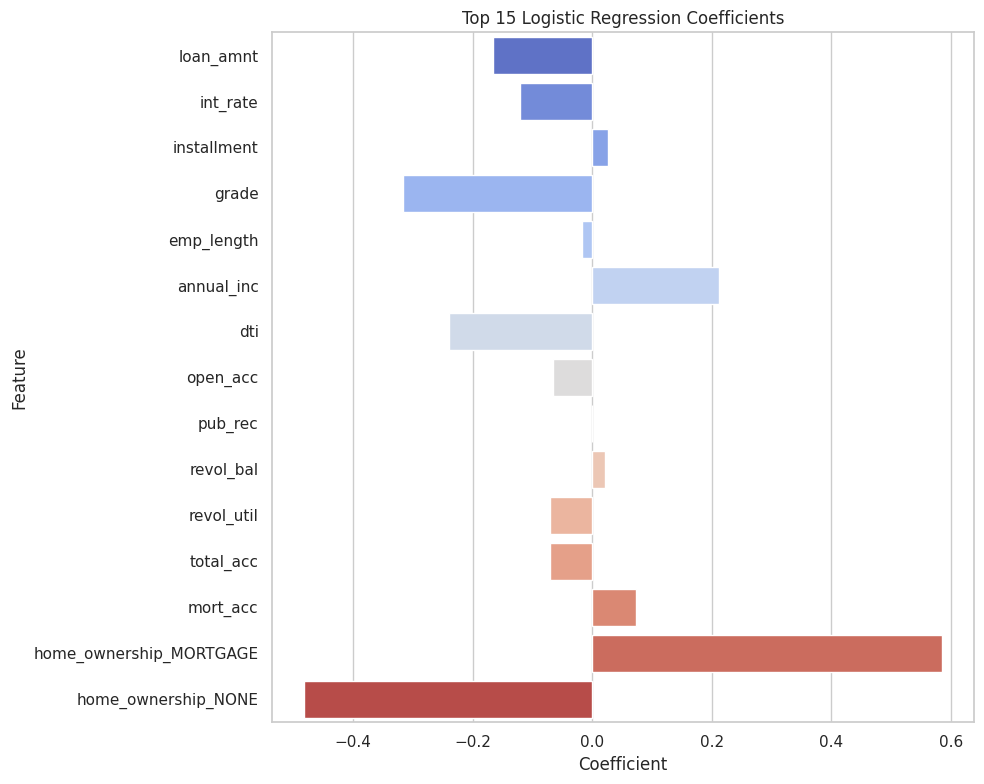

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 15 Logistic Regression Coefficients")
plt.tight_layout()
plt.show()


Key Observations:

Strongest Positive Predictors (Good loan indicators)

1. home_ownership_MORTGAGE and home_ownership_NONE
→ People with mortgage or no ownership type are more likely to repay successfully.

This might be counterintuitive for NONE — check if it's a small group or misencoded.

2. annual_inc (Annual income)
→ As expected, higher income → more likely to repay.

3. mort_acc, total_acc, revol_util
→ These show some influence, likely indicating better credit behavior.


 Strongest Negative Predictors (Risky loan indicators)

1. grade
→ Lower-grade loans are more likely to default. (Makes sense since grades are ordinal risk ratings.)

2. dti (Debt-to-income ratio)
→ Higher DTI = more debt load = higher risk of default.

3. installment, loan_amnt, int_rate
→ Larger loans, higher interest rates → associated with higher risk.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predictions
y_pred = model.predict(X_test_imputed)
y_prob = model.predict_proba(X_test_imputed)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7895
Confusion Matrix:
 [[  32  390]
 [  31 1547]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.08      0.13       422
           1       0.80      0.98      0.88      1578

    accuracy                           0.79      2000
   macro avg       0.65      0.53      0.51      2000
weighted avg       0.74      0.79      0.72      2000

ROC AUC Score: 0.7074796220544333


# ROC-AUC Curve

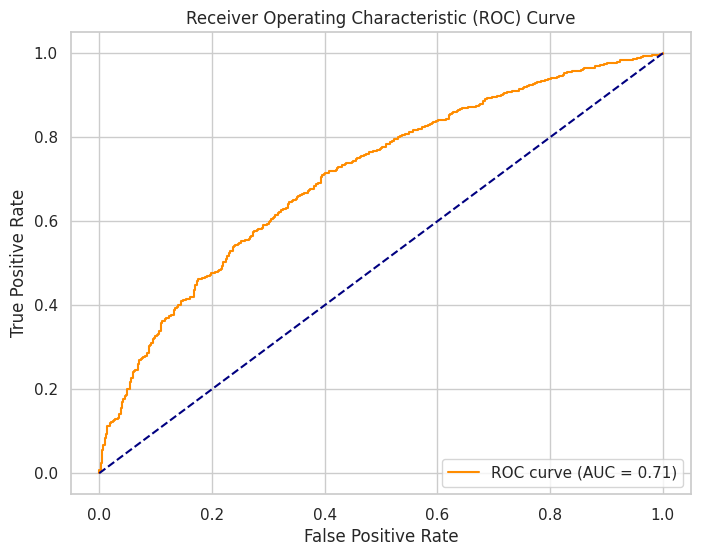

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = model.predict_proba(X_test_imputed)[:, 1]  # Use imputed X_test if you used imputation

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The model has a 71% chance of ranking a randomly chosen positive instance (e.g., Fully Paid) higher than a randomly chosen negative instance (Charged Off).

AUC of 0.71 is decent, suggesting the model has moderate discriminatory power.

# Precision-Recall Curve

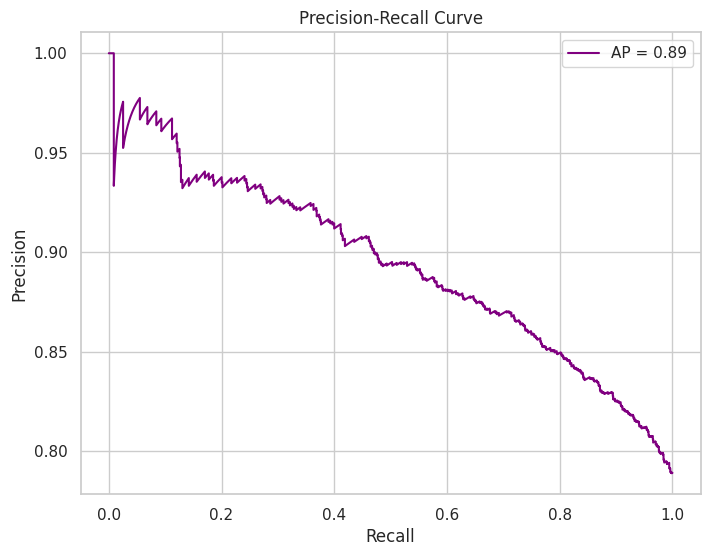

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1 = Fully Paid)
y_prob = model.predict_proba(X_test_imputed)[:, 1]

# Compute precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute average precision score (AUC for PR curve)
avg_precision = average_precision_score(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Demonstrates excellent ability to identify "Fully Paid" loans with high confidence.

An AP score of 0.89 indicates very reliable behavior in a practical classification scenario.

Tradeoff Questions:
1.	How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

By default, logistic regression uses 0.5 as the threshold.

But that may not be optimal. We can increase the threshold to:

Be stricter in classifying someone as a defaulter

Reduce false positives (good customers predicted as defaulters)

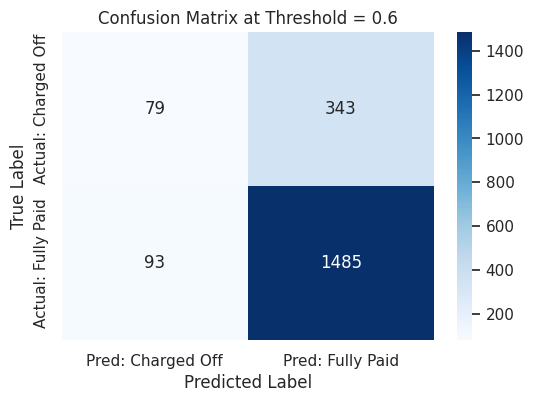

In [ ]:
from sklearn.metrics import confusion_matrix

# Step 1: Threshold predictions
threshold = 0.6
y_pred_thresholded = (y_prob >= threshold).astype(int)

# Step 2: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_thresholded)

# Step 3: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: Charged Off', 'Pred: Fully Paid'],
            yticklabels=['Actual: Charged Off', 'Actual: Fully Paid'])

plt.title(f'Confusion Matrix at Threshold = {threshold}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


2.	Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

Lower the Threshold

By default, logistic regression uses 0.5.
To catch more defaulters, use a lower threshold like 0.3 or 0.2:

In [ ]:
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

Lower threshold = More predicted defaulters = Safer disbursal strategy


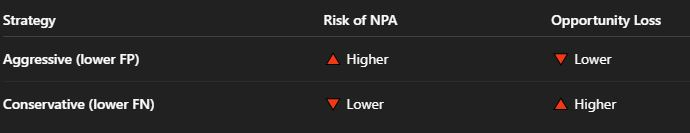


**Actionable Insights**

1. **Model Performance**

* The logistic regression model achieves:

  * **ROC AUC = 0.71** → Moderate discrimination ability
  * **Precision-Recall AUC = 0.89** → Excellent performance in identifying fully paid loans
* The model is **reliable**, especially at predicting the positive class.

2. **Important Predictive Features**

* **Top positive indicators (low risk):**

  * `home_ownership_MORTGAGE`, `annual_inc`, `mort_acc`
* **Top negative indicators (high risk):**

  * `grade`, `int_rate`, `loan_amnt`, `dti`
* Business can use these features to **design lending rules** (e.g., disqualify DTI > 40%).

3. **Risk-Based Thresholding**

* **Adjusting classification threshold** (e.g., from 0.5 → 0.3 or 0.7) significantly affects business impact:

  * Lower threshold (0.3) → Detect more defaulters, **safer** but fewer loans disbursed
  * Higher threshold (0.6+) → More disbursals, **higher revenue**, but **risk of NPA increases**

4. **Tradeoff Analysis**

* **Precision-Recall curve** shows model maintains high precision up to 70% recall — you can safely **optimize for more recall** without hurting precision much.
* **False positives** (rejected good borrowers) can be reduced with better features or human review.

**Recommendations**

### 📌 1. **Use Threshold Optimization**

* Use **different thresholds** based on risk appetite:

  * **Conservative lending:** threshold = 0.3–0.4
  * **Balanced:** threshold = 0.5
  * **Aggressive growth:** threshold = 0.6+

### 📌 2. **Human-in-the-Loop for Borderline Cases**

* Review manually when predicted probability is **between 0.45–0.55**
* This minimizes **false positives** while maintaining safety

### 📌 3. **Enrich Feature Set**

* Add more features like:

  * Credit score buckets
  * Delinquency history
  * Employer tenure or industry type
  * Bank statement summaries (if available)

### 📌 4. **Try Advanced Models**

* Consider models like:

  * **XGBoost / RandomForest** → better handling of non-linearities & feature interactions
  * **Calibrated classifiers** → more accurate probability scores

### 📌 5. **Segment Customers**

* Use different models or thresholds for:

  * Salaried vs. self-employed
  * High-income vs. low-income borrowers


# Questionnaire code

In [ ]:
df['loan_status'].value_counts(normalize=True)[1] * 100


np.float64(80.38709188697825)

In [ ]:
df[['loan_amnt', 'installment']].corr()


,loan_amnt,installment
loan_amnt,1.000000,0.950624
installment,0.950624,1.000000


In [ ]:
df['home_ownership'].value_counts().idxmax()

'MORTGAGE'